# CNN Archietectures on MNIST dataset

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# input image dimensions
img_rows, img_cols = X_train.shape[1] , X_train.shape[2]
num_pixels = img_rows*img_cols
print(num_pixels)

784


In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
#Normalizing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
print(X_train.shape)
print(X_test.shape)
print(input_shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28, 1)


In [0]:
batch_size = 128
num_classes = 10
epochs = 15

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 1. Archietecture -1 - 

### 1.1.1 Without droput, Batch Normalization

In [13]:
model_1_a = Sequential()

#conv layer 1 
model_1_a.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_1_a.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#conv layer 2 
model_1_a.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#conv layer 3
model_1_a.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_1_a.add(MaxPooling2D(pool_size=(2,2), padding='valid'))

#Flatten
model_1_a.add(Flatten())

#output class
model_1_a.add(Dense(num_classes, activation='softmax'))

#compile with adam optimizers
model_1_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_1_a.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)         

In [14]:
#fitting the model
history_1_a = model_1_a.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 19s 318us/step - loss: 0.2067 - acc: 0.9403 - val_loss: 0.0589 - val_acc: 0.9822
Epoch 2/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0593 - acc: 0.9817 - val_loss: 0.0415 - val_acc: 0.9859
Epoch 3/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0407 - acc: 0.9872 - val_loss: 0.0393 - val_acc: 0.9876
Epoch 4/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0315 - acc: 0.9902 - val_loss: 0.0342 - val_acc: 0.9889
Epoch 5/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.0285 - val_acc: 0.9901
Epoch 6/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0243 - val_acc: 0.9923
Epoch 7/15
60000/60000 [

In [15]:
score = model_1_a.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', score[1])

Test Accuracy: 0.9907


### 1.1.2 Plotting Epoch vs Loss, Epoch vs Accuracy

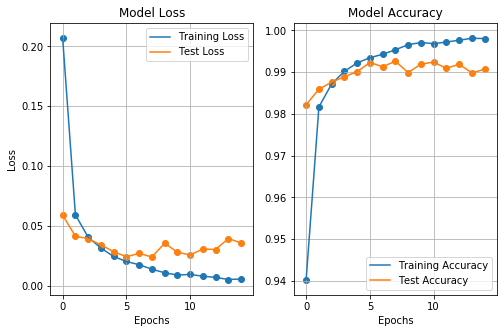

In [48]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(history_1_a.history['loss'], label='Training Loss')
plt.plot(history_1_a.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_1_a.history['loss'])
plt.scatter([i for i in range(epochs)], history_1_a.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_1_a.history['acc'], label='Training Accuracy')
plt.plot(history_1_a.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_1_a.history['acc'])
plt.scatter([i for i in range(epochs)], history_1_a.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()


### 1.1.3 Distribution of Weights

In [0]:
w_after_1_a = model_1_a.get_weights()
h1_w = w_after_1_a[0].flatten().reshape(-1,1)
h2_w = w_after_1_a[2].flatten().reshape(-1,1)
h3_w = w_after_1_a[4].flatten().reshape(-1,1)

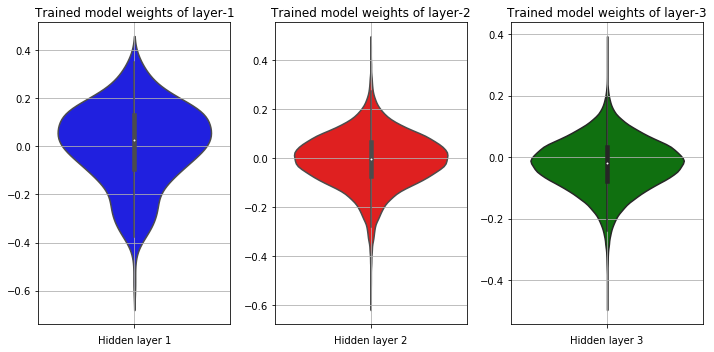

In [19]:
fig = plt.figure(figsize=(10, 5))
plt.title('Weights of the model after trained')

plt.subplot(1,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(1,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()

plt.subplot(1,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.tight_layout()
plt.grid()


plt.show()

### 1.2 With Dropout

In [20]:
model_1_b = Sequential()

#conv layer 1 with maxpooling and dropout
model_1_b.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_1_b.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model_1_b.add(Dropout(0.5))

#conv layer 2 without maxpooling
model_1_b.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#conv layer 3 with maxpoling and dropout
model_1_b.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model_1_b.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_1_b.add(Dropout(0.5))

#Flatten
model_1_b.add(Flatten())

#output class
model_1_b.add(Dense(num_classes, activation='softmax'))

#compile with adam optimizers
model_1_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_1_b.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
____

In [21]:
history_1_b = model_1_b.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.2814 - acc: 0.9122 - val_loss: 0.0570 - val_acc: 0.9822
Epoch 2/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.0874 - acc: 0.9729 - val_loss: 0.0393 - val_acc: 0.9876
Epoch 3/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.0637 - acc: 0.9805 - val_loss: 0.0319 - val_acc: 0.9890
Epoch 4/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.0534 - acc: 0.9833 - val_loss: 0.0263 - val_acc: 0.9912
Epoch 5/15
60000/60000 [==============================] - 4s 68us/step - loss: 0.0456 - acc: 0.9853 - val_loss: 0.0267 - val_acc: 0.9909
Epoch 6/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0410 - acc: 0.9871 - val_loss: 0.0228 - val_acc: 0.9921
Epoch 7/15
60000/60000 [==============================] - 4s 69us/step - loss: 0.0382 - acc: 0.9877 - val_loss: 0.0210 - val_acc

In [22]:
score_1_b = model_1_b.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy with Dropout:', score_1_b[1])

Test Accuracy with Dropout: 0.994


### 1.2.2 Plotting Epoch vs Loss , Epoch vs Accuracy

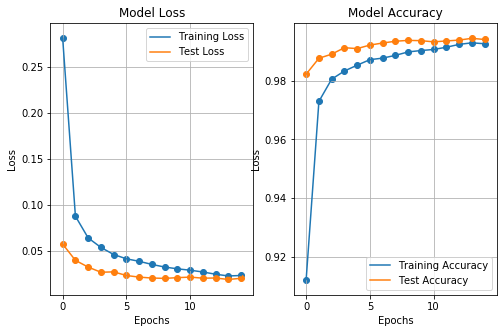

In [47]:
fig = plt.figure(figsize=(8, 5))

plt.subplot(1,2,1)
plt.plot(history_1_b.history['loss'], label='Training Loss')
plt.plot(history_1_b.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_1_b.history['loss'])
plt.scatter([i for i in range(epochs)], history_1_b.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_1_b.history['acc'], label='Training Accuracy')
plt.plot(history_1_b.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_1_b.history['acc'])
plt.scatter([i for i in range(epochs)], history_1_b.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

### 1.2.3 Distribution of Weights

In [0]:
w_after_1_b = model_1_b.get_weights()
h1_w = w_after_1_b[0].flatten().reshape(-1,1)
h2_w = w_after_1_b[2].flatten().reshape(-1,1)
h3_w = w_after_1_b[4].flatten().reshape(-1,1)

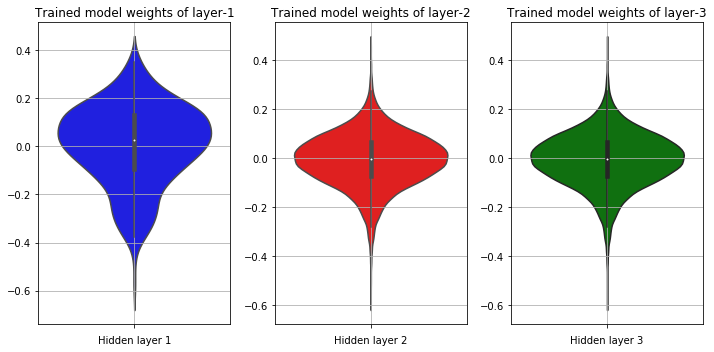

In [26]:

fig = plt.figure(figsize=(10, 5))
#plt.suptitle('Weights of the model after trained')

plt.subplot(1,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(1,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()

plt.subplot(1,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h2_w, color='g')
plt.xlabel('Hidden layer 3')
plt.tight_layout()
plt.grid()

plt.show()

## 2. Architecture - 2

### 2.1.1 Without Dropout

In [33]:
model_2_a = Sequential()

#conv layer 1 
model_2_a.add(Conv2D(128, kernel_size=(2,2), activation='relu', input_shape=input_shape))

#conv layer 2 
model_2_a.add(Conv2D(256, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_2_a.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#conv layer 3 
model_2_a.add(Conv2D(512, kernel_size=(2,2), activation='relu', input_shape=input_shape))

#conv layer 4
model_2_a.add(Conv2D(256, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_2_a.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#conv layer 5
model_2_a.add(Conv2D(128, kernel_size=(2,2), activation='relu', input_shape=input_shape))


#Flatten
model_2_a.add(Flatten())

#output class
model_2_a.add(Dense(num_classes, activation='softmax'))

#compile with adam optimizers
model_2_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_2_a.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 27, 27, 128)       640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 256)       131328    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 512)       524800    
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 256)       524544    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 5, 5, 128)        

In [34]:
history_2_a = model_2_a.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 33s 542us/step - loss: 0.1465 - acc: 0.9538 - val_loss: 0.0390 - val_acc: 0.9878
Epoch 2/15
60000/60000 [==============================] - 30s 494us/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0389 - val_acc: 0.9886
Epoch 3/15
60000/60000 [==============================] - 30s 494us/step - loss: 0.0302 - acc: 0.9901 - val_loss: 0.0301 - val_acc: 0.9909
Epoch 4/15
60000/60000 [==============================] - 30s 497us/step - loss: 0.0229 - acc: 0.9927 - val_loss: 0.0322 - val_acc: 0.9892
Epoch 5/15
60000/60000 [==============================] - 29s 488us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.0273 - val_acc: 0.9918
Epoch 6/15
60000/60000 [==============================] - 29s 482us/step - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0297 - val_acc: 0.9913
Epoch 7/15
60000/60000 [==============================] - 29s 483us/step - loss: 0.0121 - acc: 0.9960 - val_loss: 0.

In [37]:
score_2_a = model_2_a.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy without Dropout', score_2_a[1])

Test Accuracy without Dropout 0.9915


### 2.1.2 Loss vs Epoch

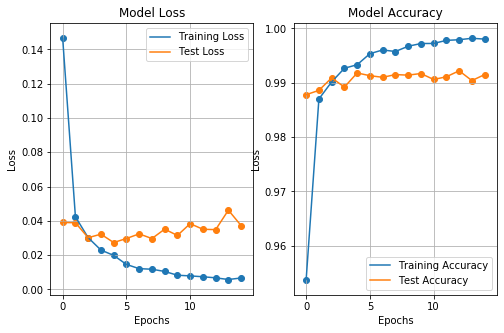

In [45]:
fig = plt.figure(figsize=(8, 5))

plt.subplot(1,2,1)
plt.plot(history_2_a.history['loss'], label='Training Loss')
plt.plot(history_2_a.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_2_a.history['loss'])
plt.scatter([i for i in range(epochs)], history_2_a.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_2_a.history['acc'], label='Training Accuracy')
plt.plot(history_2_a.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_2_a.history['acc'])
plt.scatter([i for i in range(epochs)], history_2_a.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

### 2.1.3 Distribution of Weights

In [0]:
w_after_2_a = model_2_a.get_weights()
h1_w = w_after_2_a[0].flatten().reshape(-1,1)
h2_w = w_after_2_a[2].flatten().reshape(-1,1)
h3_w = w_after_2_a[4].flatten().reshape(-1,1)
h4_w = w_after_2_a[6].flatten().reshape(-1,1)
h5_w = w_after_2_a[8].flatten().reshape(-1,1)

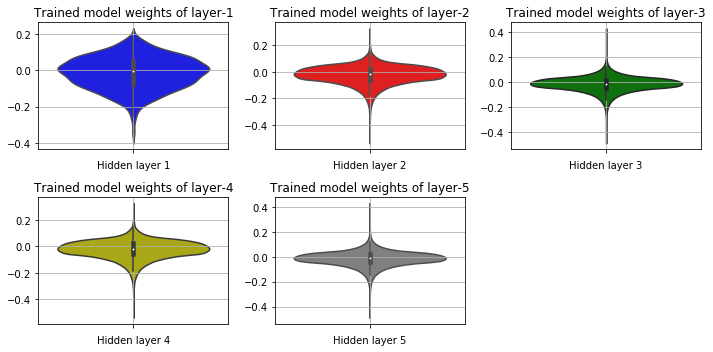

In [41]:
fig = plt.figure(figsize=(10, 5))
plt.title('Weights of the model after trained')

plt.subplot(2,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,4)
plt.title('Trained model weights of layer-4')
sns.violinplot(y=h2_w, color='y')
plt.xlabel('Hidden layer 4')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,5)
plt.title('Trained model weights of layer-5')
sns.violinplot(y=h3_w, color='gray')
plt.xlabel('Hidden layer 5')
plt.grid()
plt.tight_layout()



plt.show()

### 2.2 With Dropout and Batch Normalization

In [49]:
model_2_b = Sequential()

#conv layer 1 
model_2_b.add(Conv2D(32, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_2_b.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_2_b.add(Dropout(0.5))

#conv layer 2 
model_2_b.add(Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=input_shape))

#conv layer 3 
model_2_b.add(Conv2D(128, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_2_b.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model_2_b.add(Dropout(0.5))

#conv layer 4 
model_2_b.add(Conv2D(256, kernel_size=(2,2), activation='relu', input_shape=input_shape))

#conv layer 5 
model_2_b.add(Conv2D(512, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_2_b.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_2_b.add(Dropout(0.5))


#Flatten
model_2_b.add(Flatten())

#output class
model_2_b.add(Dense(num_classes, activation='softmax'))

#compile with adam optimizers
model_2_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_2_b.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 64)        8256      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 12, 12, 128)       32896     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 128)       

In [50]:
history_2_b = model_2_b.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 122us/step - loss: 0.3642 - acc: 0.8788 - val_loss: 0.0529 - val_acc: 0.9826
Epoch 2/15
60000/60000 [==============================] - 6s 98us/step - loss: 0.0950 - acc: 0.9697 - val_loss: 0.0373 - val_acc: 0.9870
Epoch 3/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0720 - acc: 0.9775 - val_loss: 0.0295 - val_acc: 0.9894
Epoch 4/15
60000/60000 [==============================] - 6s 98us/step - loss: 0.0586 - acc: 0.9821 - val_loss: 0.0304 - val_acc: 0.9889
Epoch 5/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0521 - acc: 0.9833 - val_loss: 0.0292 - val_acc: 0.9892
Epoch 6/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.0486 - acc: 0.9844 - val_loss: 0.0255 - val_acc: 0.9906
Epoch 7/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.0418 - acc: 0.9867 - val_loss: 0.0232 - val_ac

In [51]:
score_2_b = model_2_b.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with Dropout and BatchNorm', score_2_b[1])

Test accuracy with Dropout and BatchNorm 0.9934


### 2.2.1 Epoch vs Loss, Epoch vs Accuracy

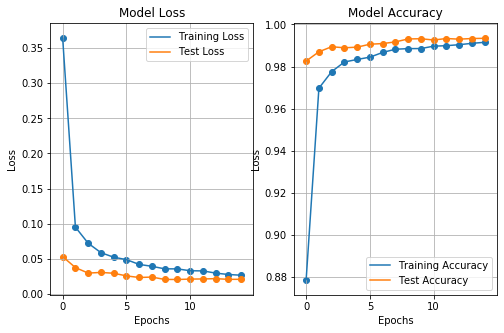

In [52]:
fig = plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(history_2_b.history['loss'], label='Training Loss')
plt.plot(history_2_b.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_2_b.history['loss'])
plt.scatter([i for i in range(epochs)], history_2_b.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_2_b.history['acc'], label='Training Accuracy')
plt.plot(history_2_b.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_2_b.history['acc'])
plt.scatter([i for i in range(epochs)], history_2_b.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

### 2.2.2 Distribution of Weights

In [0]:
w_after_2_b = model_2_b.get_weights()
h1_w = w_after_2_b[0].flatten().reshape(-1,1)
h2_w = w_after_2_b[2].flatten().reshape(-1,1)
h3_w = w_after_2_b[4].flatten().reshape(-1,1)
h4_w = w_after_2_b[6].flatten().reshape(-1,1)
h5_w = w_after_2_b[8].flatten().reshape(-1,1)

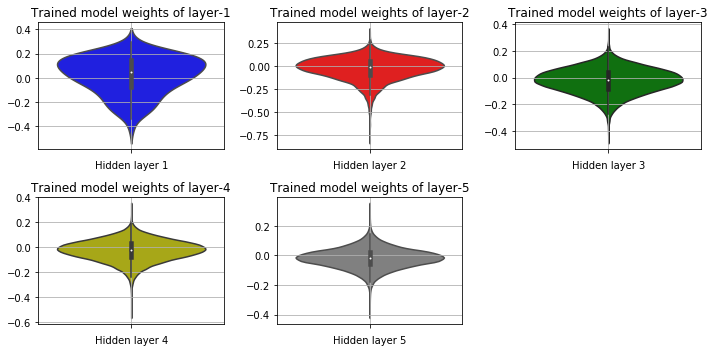

In [60]:
fig = plt.figure(figsize=(10, 5))
plt.title('Weights of the model after trained')

plt.subplot(2,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,4)
plt.title('Trained model weights of layer-4')
sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden layer 4')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,5)
plt.title('Trained model weights of layer-5')
sns.violinplot(y=h5_w, color='gray')
plt.xlabel('Hidden layer 5')
plt.grid()
plt.tight_layout()

plt.show()

## 3. Architecture - 3

### 3.1.1 Without Dropout

### Note:
    - Other than kernel size = (2,2) gives the Error of 'Negative Shape'.
      That's why i am using the kernel size of (2,2)

In [68]:
model_3_a = Sequential()

#conv layer 1 with maxpooling 
model_3_a.add(Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=input_shape))

#conv layer 2 with maxpooling
model_3_a.add(Conv2D(128, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_3_a.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#conv layer 3 with maxpoling and dropout
model_3_a.add(Conv2D(256, kernel_size=(2,2), activation='relu', input_shape=input_shape))

#conv layer 4 without maxpoling and dropout
model_3_a.add(Conv2D(512, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_3_a.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#conv layer 5 with maxpoling and dropout
model_3_a.add(Conv2D(256, kernel_size=(2,2), activation='relu', input_shape=input_shape))

#conv layer 6 with maxpoling and dropout
model_3_a.add(Conv2D(128, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_3_a.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#conv layer 7 with maxpoling and dropout
model_3_a.add(Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=input_shape))


#Flatten
model_3_a.add(Flatten())

#output class
model_3_a.add(Dense(num_classes, activation='softmax'))

#compile with adam optimizers
model_3_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_3_a.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 27, 27, 64)        320       
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 26, 26, 128)       32896     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 12, 12, 256)       131328    
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 11, 11, 512)       524800    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 6, 6, 512)         0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 5, 5, 256)       

In [69]:
history_3_a = model_3_a.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 20s 332us/step - loss: 0.1824 - acc: 0.9403 - val_loss: 0.0370 - val_acc: 0.9869
Epoch 2/15
60000/60000 [==============================] - 18s 292us/step - loss: 0.0418 - acc: 0.9868 - val_loss: 0.0327 - val_acc: 0.9896
Epoch 3/15
60000/60000 [==============================] - 18s 298us/step - loss: 0.0307 - acc: 0.9904 - val_loss: 0.0282 - val_acc: 0.9905
Epoch 4/15
60000/60000 [==============================] - 18s 300us/step - loss: 0.0234 - acc: 0.9927 - val_loss: 0.0298 - val_acc: 0.9910
Epoch 5/15
60000/60000 [==============================] - 18s 292us/step - loss: 0.0224 - acc: 0.9928 - val_loss: 0.0245 - val_acc: 0.9923
Epoch 6/15
60000/60000 [==============================] - 17s 290us/step - loss: 0.0166 - acc: 0.9947 - val_loss: 0.0318 - val_acc: 0.9902
Epoch 7/15
60000/60000 [==============================] - 17s 288us/step - loss: 0.0140 - acc: 0.9955 - val_loss: 0.

In [70]:
score_3_a = model_3_a.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy without Dropout and Batch Norm', score_3_a[1])

Test Accuracy without Dropout and Batch Norm 0.9921


### 3.1.1 Epoch vs Loss , Epoch vs Accuracy

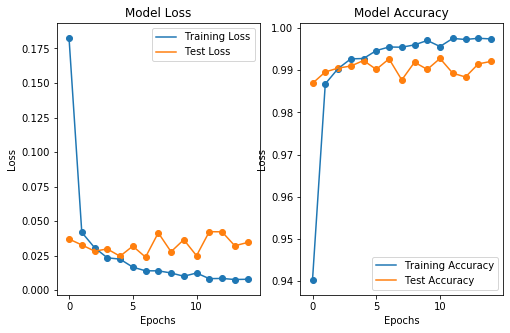

In [71]:
fig = plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(history_3_a.history['loss'], label='Training Loss')
plt.plot(history_3_a.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)],history_3_a.history['loss'] )
plt.scatter([i for i in range(epochs)],history_3_a.history['val_loss'] )
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_3_a.history['acc'], label='Training Accuracy')
plt.plot(history_3_a.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)],history_3_a.history['acc'] )
plt.scatter([i for i in range(epochs)],history_3_a.history['val_acc'] )
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 3.1.2 Distribution of Weights

In [0]:
w_after_3_a = model_3_a.get_weights()
h1_w = w_after_3_a[0].flatten().reshape(-1,1)
h2_w = w_after_3_a[2].flatten().reshape(-1,1)
h3_w = w_after_3_a[4].flatten().reshape(-1,1)
h4_w = w_after_3_a[6].flatten().reshape(-1,1)
h5_w = w_after_3_a[8].flatten().reshape(-1,1)
h6_w = w_after_3_a[10].flatten().reshape(-1,1)
h7_w = w_after_3_a[12].flatten().reshape(-1,1)

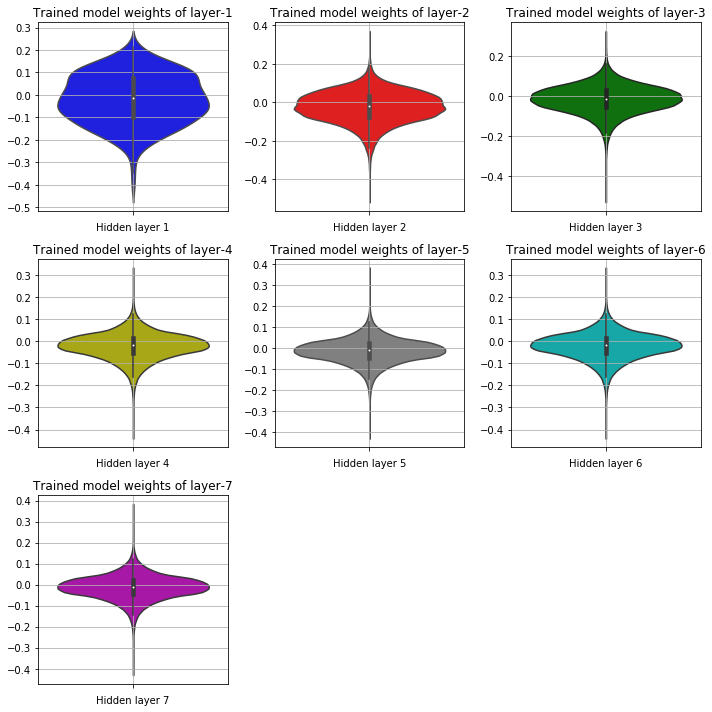

In [74]:
fig = plt.figure(figsize=(10, 10))
plt.title('Weights of the model after trained')

plt.subplot(3,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(3,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(3,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.subplot(3,3,4)
plt.title('Trained model weights of layer-4')
sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden layer 4')
plt.tight_layout()
plt.grid()


plt.subplot(3,3,5)
plt.title('Trained model weights of layer-5')
sns.violinplot(y=h5_w, color='gray')
plt.xlabel('Hidden layer 5')
plt.grid()
plt.tight_layout()

plt.subplot(3,3,6)
plt.title('Trained model weights of layer-6')
sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden layer 6')
plt.tight_layout()
plt.grid()


plt.subplot(3,3,7)
plt.title('Trained model weights of layer-7')
sns.violinplot(y=h5_w, color='m')
plt.xlabel('Hidden layer 7')
plt.grid()
plt.tight_layout()

plt.show()

## 3.2 With Dropout and Batch Normalization

In [76]:
model_3_b = Sequential()

#conv layer 1 
model_3_b.add(Conv2D(64, kernel_size=(2,2), activation='relu', input_shape=input_shape))
model_3_b.add(Dropout(0.2))

#conv layer 2 
model_3_b.add(Conv2D(128, kernel_size=(2,2), activation='relu' ))
model_3_b.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_3_b.add(Dropout(0.3))

#conv layer 3 
model_3_b.add(Conv2D(256, kernel_size=(2,2), activation='relu'))
model_3_b.add(Dropout(0.4))


#conv layer 4 
model_3_b.add(Conv2D(512, kernel_size=(2,2), activation='relu'))
model_3_b.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_3_b.add(Dropout(0.5))


#conv layer 5 
model_3_b.add(Conv2D(256, kernel_size=(2,2), activation='relu'))
model_3_b.add(Dropout(0.4))


#conv layer 6 
model_3_b.add(Conv2D(128, kernel_size=(2,2), activation='relu'))
model_3_b.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_3_b.add(Dropout(0.3))


#conv layer 7 
model_3_b.add(Conv2D(64, kernel_size=(2,2), activation='relu'))
model_3_b.add(Dropout(0.2))


#Flatten
model_3_b.add(Flatten())

#output class
model_3_b.add(Dense(num_classes, activation='softmax'))

#compile with adam optimizers
model_3_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_3_b.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 27, 27, 64)        320       
_________________________________________________________________
dropout_14 (Dropout)         (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 26, 26, 128)       32896     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 12, 12, 256)       131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 12, 256)     

In [77]:
history_3_b = model_3_b.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 22s 359us/step - loss: 0.4536 - acc: 0.8506 - val_loss: 0.0577 - val_acc: 0.9833
Epoch 2/15
60000/60000 [==============================] - 21s 346us/step - loss: 0.1101 - acc: 0.9668 - val_loss: 0.0389 - val_acc: 0.9873
Epoch 3/15
60000/60000 [==============================] - 21s 346us/step - loss: 0.0796 - acc: 0.9759 - val_loss: 0.0313 - val_acc: 0.9906
Epoch 4/15
60000/60000 [==============================] - 20s 334us/step - loss: 0.0651 - acc: 0.9803 - val_loss: 0.0289 - val_acc: 0.9912
Epoch 5/15
60000/60000 [==============================] - 20s 333us/step - loss: 0.0609 - acc: 0.9817 - val_loss: 0.0248 - val_acc: 0.9925
Epoch 6/15
60000/60000 [==============================] - 20s 334us/step - loss: 0.0546 - acc: 0.9830 - val_loss: 0.0254 - val_acc: 0.9920
Epoch 7/15
60000/60000 [==============================] - 20s 335us/step - loss: 0.0512 - acc: 0.9847 - val_loss: 0.

In [78]:
score_3_b = model_3_b.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with Dropout', score_3_b[1])

Test accuracy with BatchNorm and Dropout 0.9945


### 3.2.1 Loss vs Epoch , Epoch vs Accuracy

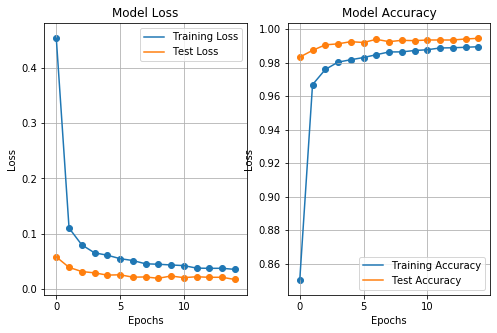

In [81]:
fig = plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(history_3_b.history['loss'], label='Training Loss')
plt.plot(history_3_b.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_3_b.history['loss'])
plt.scatter([i for i in range(epochs)], history_3_b.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_3_b.history['acc'], label='Training Accuracy')
plt.plot(history_3_b.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_3_b.history['acc'])
plt.scatter([i for i in range(epochs)], history_3_b.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.show()

### 3.2.2 Distribution of Weights

In [0]:
w_after_3_b = model_3_b.get_weights()
h1_w = w_after_3_b[0].flatten().reshape(-1,1)
h2_w = w_after_3_b[2].flatten().reshape(-1,1)
h3_w = w_after_3_b[4].flatten().reshape(-1,1)
h4_w = w_after_3_b[6].flatten().reshape(-1,1)
h5_w = w_after_3_b[8].flatten().reshape(-1,1)
h6_w = w_after_3_b[10].flatten().reshape(-1,1)
h7_w = w_after_3_b[12].flatten().reshape(-1,1)

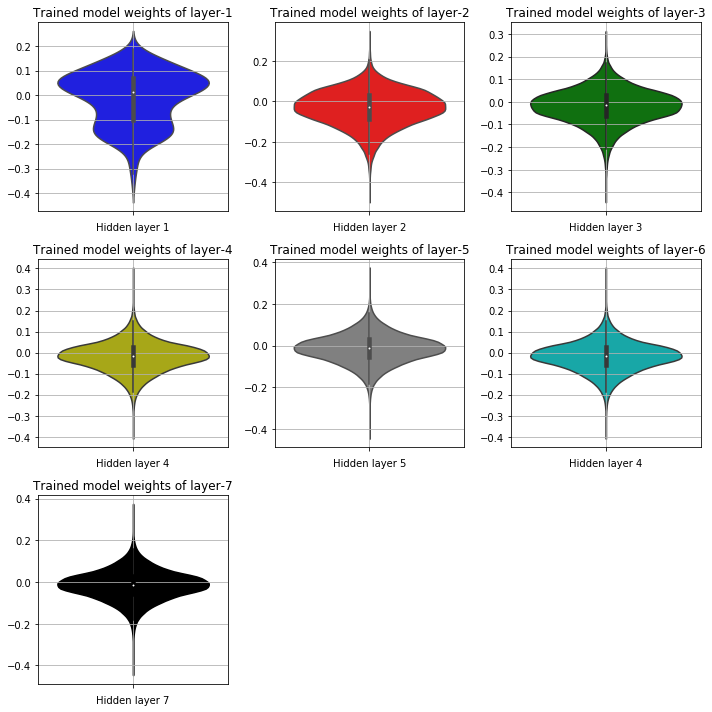

In [85]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(3,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(3,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(3,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.subplot(3,3,4)
plt.title('Trained model weights of layer-4')
sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden layer 4')
plt.tight_layout()
plt.grid()


plt.subplot(3,3,5)
plt.title('Trained model weights of layer-5')
sns.violinplot(y=h5_w, color='gray')
plt.xlabel('Hidden layer 5')
plt.grid()
plt.tight_layout()

plt.subplot(3,3,6)
plt.title('Trained model weights of layer-6')
sns.violinplot(y=h4_w, color='c')
plt.xlabel('Hidden layer 4')
plt.tight_layout()
plt.grid()


plt.subplot(3,3,7)
plt.title('Trained model weights of layer-7')
sns.violinplot(y=h5_w, color='k')
plt.xlabel('Hidden layer 7')
plt.grid()
plt.tight_layout()

plt.show()

# Comparison

[]

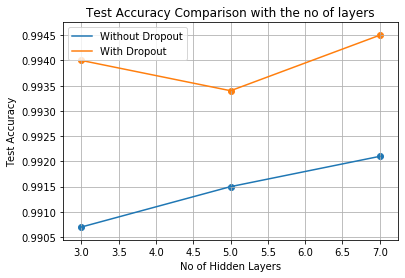

In [91]:
Test_accuracy_without_dropout = [score[1], score_2_a[1], score_3_a[1]]
Test_accuracy_with_dropout = [score_1_b[1], score_2_b[1], score_3_b[1]]
no_of_hidden_layer = [3, 5, 7]

plt.plot(no_of_hidden_layer, Test_accuracy_without_dropout, label='Without Dropout')
plt.plot(no_of_hidden_layer, Test_accuracy_with_dropout, label='With Dropout')
plt.scatter(no_of_hidden_layer, Test_accuracy_without_dropout)
plt.scatter(no_of_hidden_layer, Test_accuracy_with_dropout)

plt.title('Test Accuracy Comparison with the no of layers')
plt.grid()
plt.xlabel('No of Hidden Layers')
plt.ylabel('Test Accuracy')
#plt.yscale('symlog')
plt.legend()
plt.plot()

## Summary:
    - Here also we can see that the Accuracy is high when we used Dropout

# That's the end of the code